# Некоторая теория по коммивояжеру

In [73]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

import pandas as pd
import numpy as np
import networkx as nx
from scipy import sparse
from scipy.sparse import linalg as sl

In [74]:
path = "/Users/User/Desktop/VS code/"
num_name = {0: "O", 1: 'A', 2: "B", 3: "C", 4: "D", 5: "E", 6: "F", 7: "G", 8: "H", 9: "I", 10: "J", 11: "K", 12: "L", 13: "M", 14: "N"}

graph = pd.read_csv(path + "quhack_25/commis-voyageur/graph.csv")
graph.values

array([[         0,         15,         30,         25,         40,
                17,         32, 1000000000,         28, 1000000000,
                26,         31,         42, 1000000000,         35],
       [        15,          0,          8, 1000000000,         18,
        1000000000, 1000000000, 1000000000,         20, 1000000000,
                11,         19, 1000000000,         26, 1000000000],
       [        30,          8,          0,          9,         16,
                14, 1000000000, 1000000000,         14, 1000000000,
        1000000000, 1000000000,         23, 1000000000, 1000000000],
       [        25, 1000000000,          9,          0, 1000000000,
                21, 1000000000,         16, 1000000000,         30,
        1000000000,         33, 1000000000,         40,         19],
       [        40,         18,         16, 1000000000,          0,
        1000000000,         22, 1000000000, 1000000000, 1000000000,
        1000000000,         29,         25, 

In [56]:
list(num_name.values())

['O', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']

In [75]:
graph

,O,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,0,15,30,25,40,17,32,1000000000,28,1000000000,26,31,42,1000000000,35
1,15,0,8,1000000000,18,1000000000,1000000000,1000000000,20,1000000000,11,19,1000000000,26,1000000000
2,30,8,0,9,16,14,1000000000,1000000000,14,1000000000,1000000000,1000000000,23,1000000000,1000000000
3,25,1000000000,9,0,1000000000,21,1000000000,16,1000000000,30,1000000000,33,1000000000,40,19
4,40,18,16,1000000000,0,1000000000,22,1000000000,1000000000,1000000000,1000000000,29,25,38,1000000000
5,17,1000000000,14,21,1000000000,0,1000000000,1000000000,27,14,1000000000,27,1000000000,1000000000,24
6,32,1000000000,1000000000,1000000000,22,1000000000,0,10,1000000000,1000000000,22,26,1000000000,35,31
7,1000000000,1000000000,1000000000,16,1000000000,1000000000,10,0,24,17,1000000000,1000000000,29,38,1000000000
8,28,20,14,1000000000,1000000000,27,1000000000,24,0,1000000000,19,1000000000,1000000000,29,23
9,1000000000,1000000000,1000000000,30,1000000000,14,1000000000,17,1000000000,0,24,30,1000000000,39,1000000000


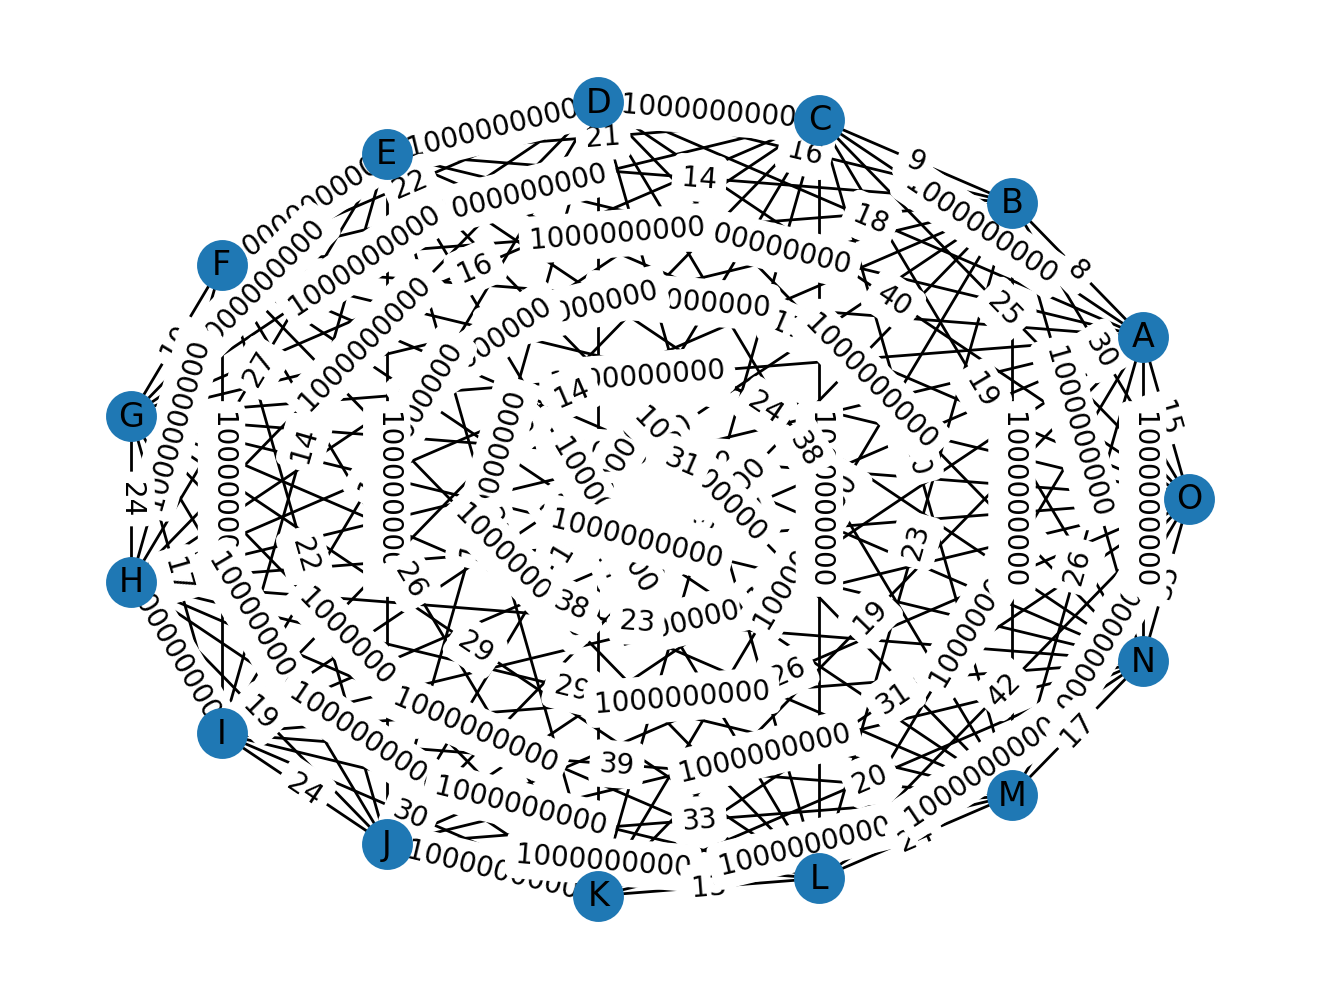

In [76]:
g = nx.Graph(graph.values)

pos = nx.drawing.layout.circular_layout(g)
nx.draw(g, pos=pos)
edge_weights = nx.get_edge_attributes(g, "weight")
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=edge_weights)
nx.draw_networkx_labels(g, pos=pos, labels=num_name)

plt.show()

Решение в `networkx`

In [77]:
nx_solution = nx.algorithms.approximation.traveling_salesman_problem(g, cycle=True)
print(f"NetworkX solution (nodes order): {[num_name[num] for num in nx_solution]}")

nx_solution_cost = 0
for i in range(len(nx_solution) - 1):
    nx_solution_cost += g.get_edge_data(nx_solution[i], nx_solution[i + 1])["weight"]

print(f"NetworkX solution (total cost): {nx_solution_cost}")

NetworkX solution (nodes order): ['O', 'E', 'I', 'E', 'B', 'D', 'F', 'G', 'C', 'N', 'M', 'L', 'K', 'A', 'J', 'H', 'O']
NetworkX solution (total cost): 273


In [6]:
def sigma_z_mod(k: int, size: int) -> sparse.csr_matrix:
    sz_mod = sparse.coo_matrix(
        [
            [1, 0,],
            [0, 0,],
        ]
    )

    left_ith = sparse.eye(2 ** k, format="coo", dtype=np.int64)
    right_ith = sparse.eye(2 ** (size - k - 1), format="coo", dtype=np.int64)

    return sparse.kron(
        sparse.kron(left_ith, sz_mod),
        right_ith
    )

def sigmaz_k(k: int, n: int) -> sparse.csr_matrix:
    left_part = sparse.eye(2 ** k, dtype=np.int64)
    right_part = sparse.eye(2 ** (n - 1 - k), dtype=np.int64)

    return sparse.kron(
        sparse.kron(
            left_part,
            sparse.csr_matrix(np.array([[1, 0,], [0, -1,],], dtype=np.int64))
        ),
        right_part
    )

def probs2bit_str(probs: np.array) -> str:
    size = int(np.log2(probs.shape[0]))
    bit_s_num = np.where(probs == probs.max())[0][0]
    s = f"{bit_s_num:b}"
    s = "0" * (size - len(s)) + s

    return s


eigs = np.linalg.eig(sigma_z_mod(1, 3).toarray())

for i, psi in enumerate(eigs[1]):
    probs = psi * psi.conj()
    bit_s = probs2bit_str(probs)
    print(f"Eigenvalue: {eigs[0][i]}\tBit string: {bit_s}")


Eigenvalue: 1.0	Bit string: 000
Eigenvalue: 1.0	Bit string: 001
Eigenvalue: 0.0	Bit string: 010
Eigenvalue: 0.0	Bit string: 011
Eigenvalue: 1.0	Bit string: 100
Eigenvalue: 1.0	Bit string: 101
Eigenvalue: 0.0	Bit string: 110
Eigenvalue: 0.0	Bit string: 111


Решение чисто через `scipy`

Метод для небольших `size` (числа вершин)

In [8]:
2**(14**2)/10

1.004336277661869e+58

In [98]:
def convert_tsp_to_ising(g: nx.Graph) -> sparse.coo_matrix:
    # Имеется два элемента гамильтониана:
    #  - часть, дающая нам Гамилтонов цикл
    #  - часть, считающая стоимость пути
    # Для нас важно, чтобы вес первой части превалирвал.
    # Поэтому, в качестве коэффициента берем
    # пятикратное значение максимального веса ребер в графе.

    a = 5 * max([e[2]["weight"] for e in g.edges(data=True)])
    size = g.number_of_nodes() - 1

    H = sparse.coo_matrix((2 ** (size ** 2), 2 ** (size ** 2)), dtype=np.int64)

    # Вычисляем сумму по колонкам:
    #   - каждая вершина должна быть в каждой колонке строго один раз
    for i in range(size):
        # Считаем выражение 1 - sum
        col_sum = sparse.eye(2 ** (size ** 2), format="coo", dtype=np.int64)
        for j in range(size):
            col_sum -= sigma_z_mod(i + j * size, size ** 2)

        # Возводим в квадрат и добавляем к гамильтониану
        H += a * col_sum * col_sum

    # Вычисляем сумму по строкам:
    #   - каждая вершина должна быть в каждой строке строго один раз
    for j in range(size):
        row_sum = sparse.eye(2 ** (size ** 2), format="coo", dtype=np.int64)
        for i in range(size):
            row_sum -= sigma_z_mod(i + j * size, size ** 2)

        # Аналогично, в квадрат и добавляем
        H += a * row_sum * row_sum

    # Считаем сумму по тем ребрам, которых в графе нет и тем, которые есть.
    for i in range(size):
        for j in range(size):
            if g.has_edge(i + 1, j + 1):
                # Сумма по всем ребрам графа
                coef = g.get_edge_data(i + 1, j + 1)["weight"]
            else:
                # Сумма по всем отсутствующим ребрам графа
                coef = a

            for k in range(size - 1):
                # Дальше просто используем полученный коэффициент и считаем сумму
                H += (
                    coef
                    * sigma_z_mod(i + k * size, size ** 2)
                    * sigma_z_mod(j + (k + 1) * size, size ** 2)
                )

            H += (
                coef
                * sigma_z_mod(i + (size - 1) * size, size ** 2)
                * sigma_z_mod(j, size ** 2)
            )

    # Начинаем всегда из нулевой вершины, это позволяет снизить число необходимых кубитов.
    # Теперь должны добавить в гамильтониан слагаемое, отвечающее за нулевую вершину в пути.
    for j in range(size):
        if g.has_edge(0, j + 1):
            coef = g.get_edge_data(0, j + 1)["weight"]
        else:
            coef = a

        H += coef * sigma_z_mod(j, size ** 2)
        H += coef * sigma_z_mod(j + (size - 1) * size, size ** 2)

    # PennyLane работает с матрицами только в координатном формате, поэтому сразу делаем приведение.
    return sparse.coo_matrix(H, dtype=np.int64)


op = convert_tsp_to_ising(g)
scipy_solution = sl.eigs(op, k=1, which="SR", return_eigenvectors=True)
print(f"Ground state energy: {scipy_solution[0][0]:.4f}")

probs = scipy_solution[1] * scipy_solution[1].conj()
bit_s = probs2bit_str(probs)

# Нулевая вершина всегда первая
scipy_path = [0,]

for i in range(3):
    k = 0
    for j in range(3):
        if bit_s[j + i * 3] == "0":
            k = j + 1
    scipy_path.append(k)
scipy_path.append(0)

scipy_solution_cost = 0
for i in range(len(scipy_path) - 1):
    scipy_solution_cost += g.get_edge_data(scipy_path[i], scipy_path[i + 1])["weight"]

print(f"SciPy solution (nodes order): {scipy_path}")
print(f"SciPy solution (total cost): {scipy_solution_cost}")

OverflowError: Python int too large to convert to C long

## Через Pennylane

In [9]:
import pennylane as qml
from pennylane import numpy as np

def tsp_to_hamiltonian(g: nx.Graph):
    """
    Строит гамильтониан задачи коммивояжёра для графа g в виде
    qml.Hamiltonian(coeffs, ops).
    Вершина 0 фиксируется как стартовая.
    """

    max_w = max([d["weight"] for _, _, d in g.edges(data=True)])
    a = 5 * max_w  # коэффициент штрафа

    n_nodes = g.number_of_nodes()
    size = n_nodes - 1  # кубитов = size^2
    n_qubits = size * size

    coeffs = []
    ops = []

    def add_term(c, op):
        if abs(c) > 1e-12:  # отбрасываем нулевые
            coeffs.append(float(c))
            ops.append(op)

    # --- Ограничения (по строкам и колонкам) ---
    # Каждая вершина встречается один раз в строке и колонке
    for i in range(size):
        # столбцы
        wires = [i + j*size for j in range(size)]
        for w in wires:
            add_term(-2*a, qml.PauliZ(w))
        for k in range(len(wires)):
            for l in range(k+1, len(wires)):
                add_term(2*a, qml.PauliZ(wires[k]) @ qml.PauliZ(wires[l]))

    for j in range(size):
        # строки
        wires = [i + j*size for i in range(size)]
        for w in wires:
            add_term(-2*a, qml.PauliZ(w))
        for k in range(len(wires)):
            for l in range(k+1, len(wires)):
                add_term(2*a, qml.PauliZ(wires[k]) @ qml.PauliZ(wires[l]))

    # --- Стоимость пути ---
    for i in range(size):
        for j in range(size):
            if g.has_edge(i+1, j+1):
                coef = g[i+1][j+1]["weight"]
            else:
                coef = a

            for k in range(size-1):
                w1 = i + k*size
                w2 = j + (k+1)*size
                add_term(coef, qml.PauliZ(w1) @ qml.PauliZ(w2))

            # замыкание цикла
            w1 = i + (size-1)*size
            w2 = j
            add_term(coef, qml.PauliZ(w1) @ qml.PauliZ(w2))

    # --- Фиксируем стартовую вершину ---
    for j in range(size):
        if g.has_edge(0, j+1):
            coef = g[0][j+1]["weight"]
        else:
            coef = a
        add_term(coef, qml.PauliZ(j))
        add_term(coef, qml.PauliZ(j + (size-1)*size))

    return qml.Hamiltonian(coeffs, ops)

In [19]:
# простой граф

np.random.seed(42)
rand_mat =  np.random.randint(0, 100, size=(4, 4))
rand_mat = (rand_mat + rand_mat.T) // 2
np.fill_diagonal(rand_mat, 0)
g = nx.from_numpy_array(rand_mat)
H = tsp_to_hamiltonian(g)*0.1

print("Кубитов:", (g.number_of_nodes()-1)**2)
print("Число термов:", len(H.ops))
print("Гамильтониан:\n", H)

Кубитов: 9
Число термов: 69
Гамильтониан:
 -78.0 * Z(0) + -78.0 * Z(3) + -78.0 * Z(6) + 78.0 * (Z(0) @ Z(3)) + 78.0 * (Z(0) @ Z(6)) + 78.0 * (Z(3) @ Z(6)) + -78.0 * Z(1) + -78.0 * Z(4) + -78.0 * Z(7) + 78.0 * (Z(1) @ Z(4)) + 78.0 * (Z(1) @ Z(7)) + 78.0 * (Z(4) @ Z(7)) + -78.0 * Z(2) + -78.0 * Z(5) + -78.0 * Z(8) + 78.0 * (Z(2) @ Z(5)) + 78.0 * (Z(2) @ Z(8)) + 78.0 * (Z(5) @ Z(8)) + -78.0 * Z(0) + -78.0 * Z(1) + -78.0 * Z(2) + 78.0 * (Z(0) @ Z(1)) + 78.0 * (Z(0) @ Z(2)) + 78.0 * (Z(1) @ Z(2)) + -78.0 * Z(3) + -78.0 * Z(4) + -78.0 * Z(5) + 78.0 * (Z(3) @ Z(4)) + 78.0 * (Z(3) @ Z(5)) + 78.0 * (Z(4) @ Z(5)) + -78.0 * Z(6) + -78.0 * Z(7) + -78.0 * Z(8) + 78.0 * (Z(6) @ Z(7)) + 78.0 * (Z(6) @ Z(8)) + 78.0 * (Z(7) @ Z(8)) + 39.0 * (Z(0) @ Z(3)) + 39.0 * (Z(3) @ Z(6)) + 39.0 * (Z(6) @ Z(0)) + 7.800000000000001 * (Z(0) @ Z(4)) + 7.800000000000001 * (Z(3) @ Z(7)) + 7.800000000000001 * (Z(6) @ Z(1)) + 4.4 * (Z(0) @ Z(5)) + 4.4 * (Z(3) @ Z(8)) + 4.4 * (Z(6) @ Z(2)) + 7.800000000000001 * (Z(1) @ Z(

In [20]:
size = len(H.wires)

def layer(params):
    for i in range(size):
        qml.RY(params[i][0], wires=i)
        qml.RZ(params[i][1], wires=i)

    for i in range(size - 1):
        qml.CZ(wires=[i, i + 1])

In [21]:
device = qml.device("default.qubit", wires=size)
num_layers = 3

@qml.qnode(device, diff_method="parameter-shift")
def feed_forward(params, wires=size):
    for k in range(3):
        layer(params[k])

    for i in range(size):
        qml.RY(params[-1][i][0], wires=i)
        qml.RZ(params[-1][i][1], wires=i)

    return qml.expval(H)

In [24]:
opt = qml.AdamOptimizer(stepsize=0.1)
params = tuple(
    tuple(
        (
            np.random.uniform(0, 2*np.pi, requires_grad=True),
            np.random.uniform(0, 2*np.pi, requires_grad=True),
        )
        for _ in range(size)
    )
    for _ in range(num_layers + 1)
)

In [25]:
energy = [
    feed_forward(params),
]

for epoch in range(85):
    params, e = opt.step_and_cost(feed_forward, params)
    energy.append(e)

    if epoch % 5 == 0:
        print(f"epoch: {epoch}\tenergy: {e:.6f}")

/Users/User/anaconda3/lib/python3.12/site-packages/pennylane/_grad.py:216: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


epoch: 0	energy: -106.582035
epoch: 5	energy: -106.582035
epoch: 10	energy: -106.582035
epoch: 15	energy: -106.582035
epoch: 20	energy: -106.582035
epoch: 25	energy: -106.582035
epoch: 30	energy: -106.582035
epoch: 35	energy: -106.582035
epoch: 40	energy: -106.582035
epoch: 45	energy: -106.582035
epoch: 50	energy: -106.582035
epoch: 55	energy: -106.582035
epoch: 60	energy: -106.582035
epoch: 65	energy: -106.582035
epoch: 70	energy: -106.582035
epoch: 75	energy: -106.582035
epoch: 80	energy: -106.582035


In [16]:
n_qubits = len(H.wires)
dev = qml.device("default.qubit", wires=n_qubits)

def ansatz(params):
    for i in range(n_qubits-1):
        qml.CNOT(wires=[i, i+1])
    
    for i in range(n_qubits):
        qml.RY(params[i], wires=i)
   
@qml.qnode(dev)
def circuit(params):
    ansatz(params)
    return qml.expval(H)
# параметры для оптимизации
params = np.random.uniform(0, 2*np.pi, n_qubits, requires_grad=True)

opt = qml.GradientDescentOptimizer(stepsize=0.1)
energy = []
for step in range(50):
    params, e = opt.step_and_cost(circuit, params)
    energy.append(e)
    print(f"step {step}, energy = {e}")

ValueError: maximum supported dimension for an ndarray is 32, found 196

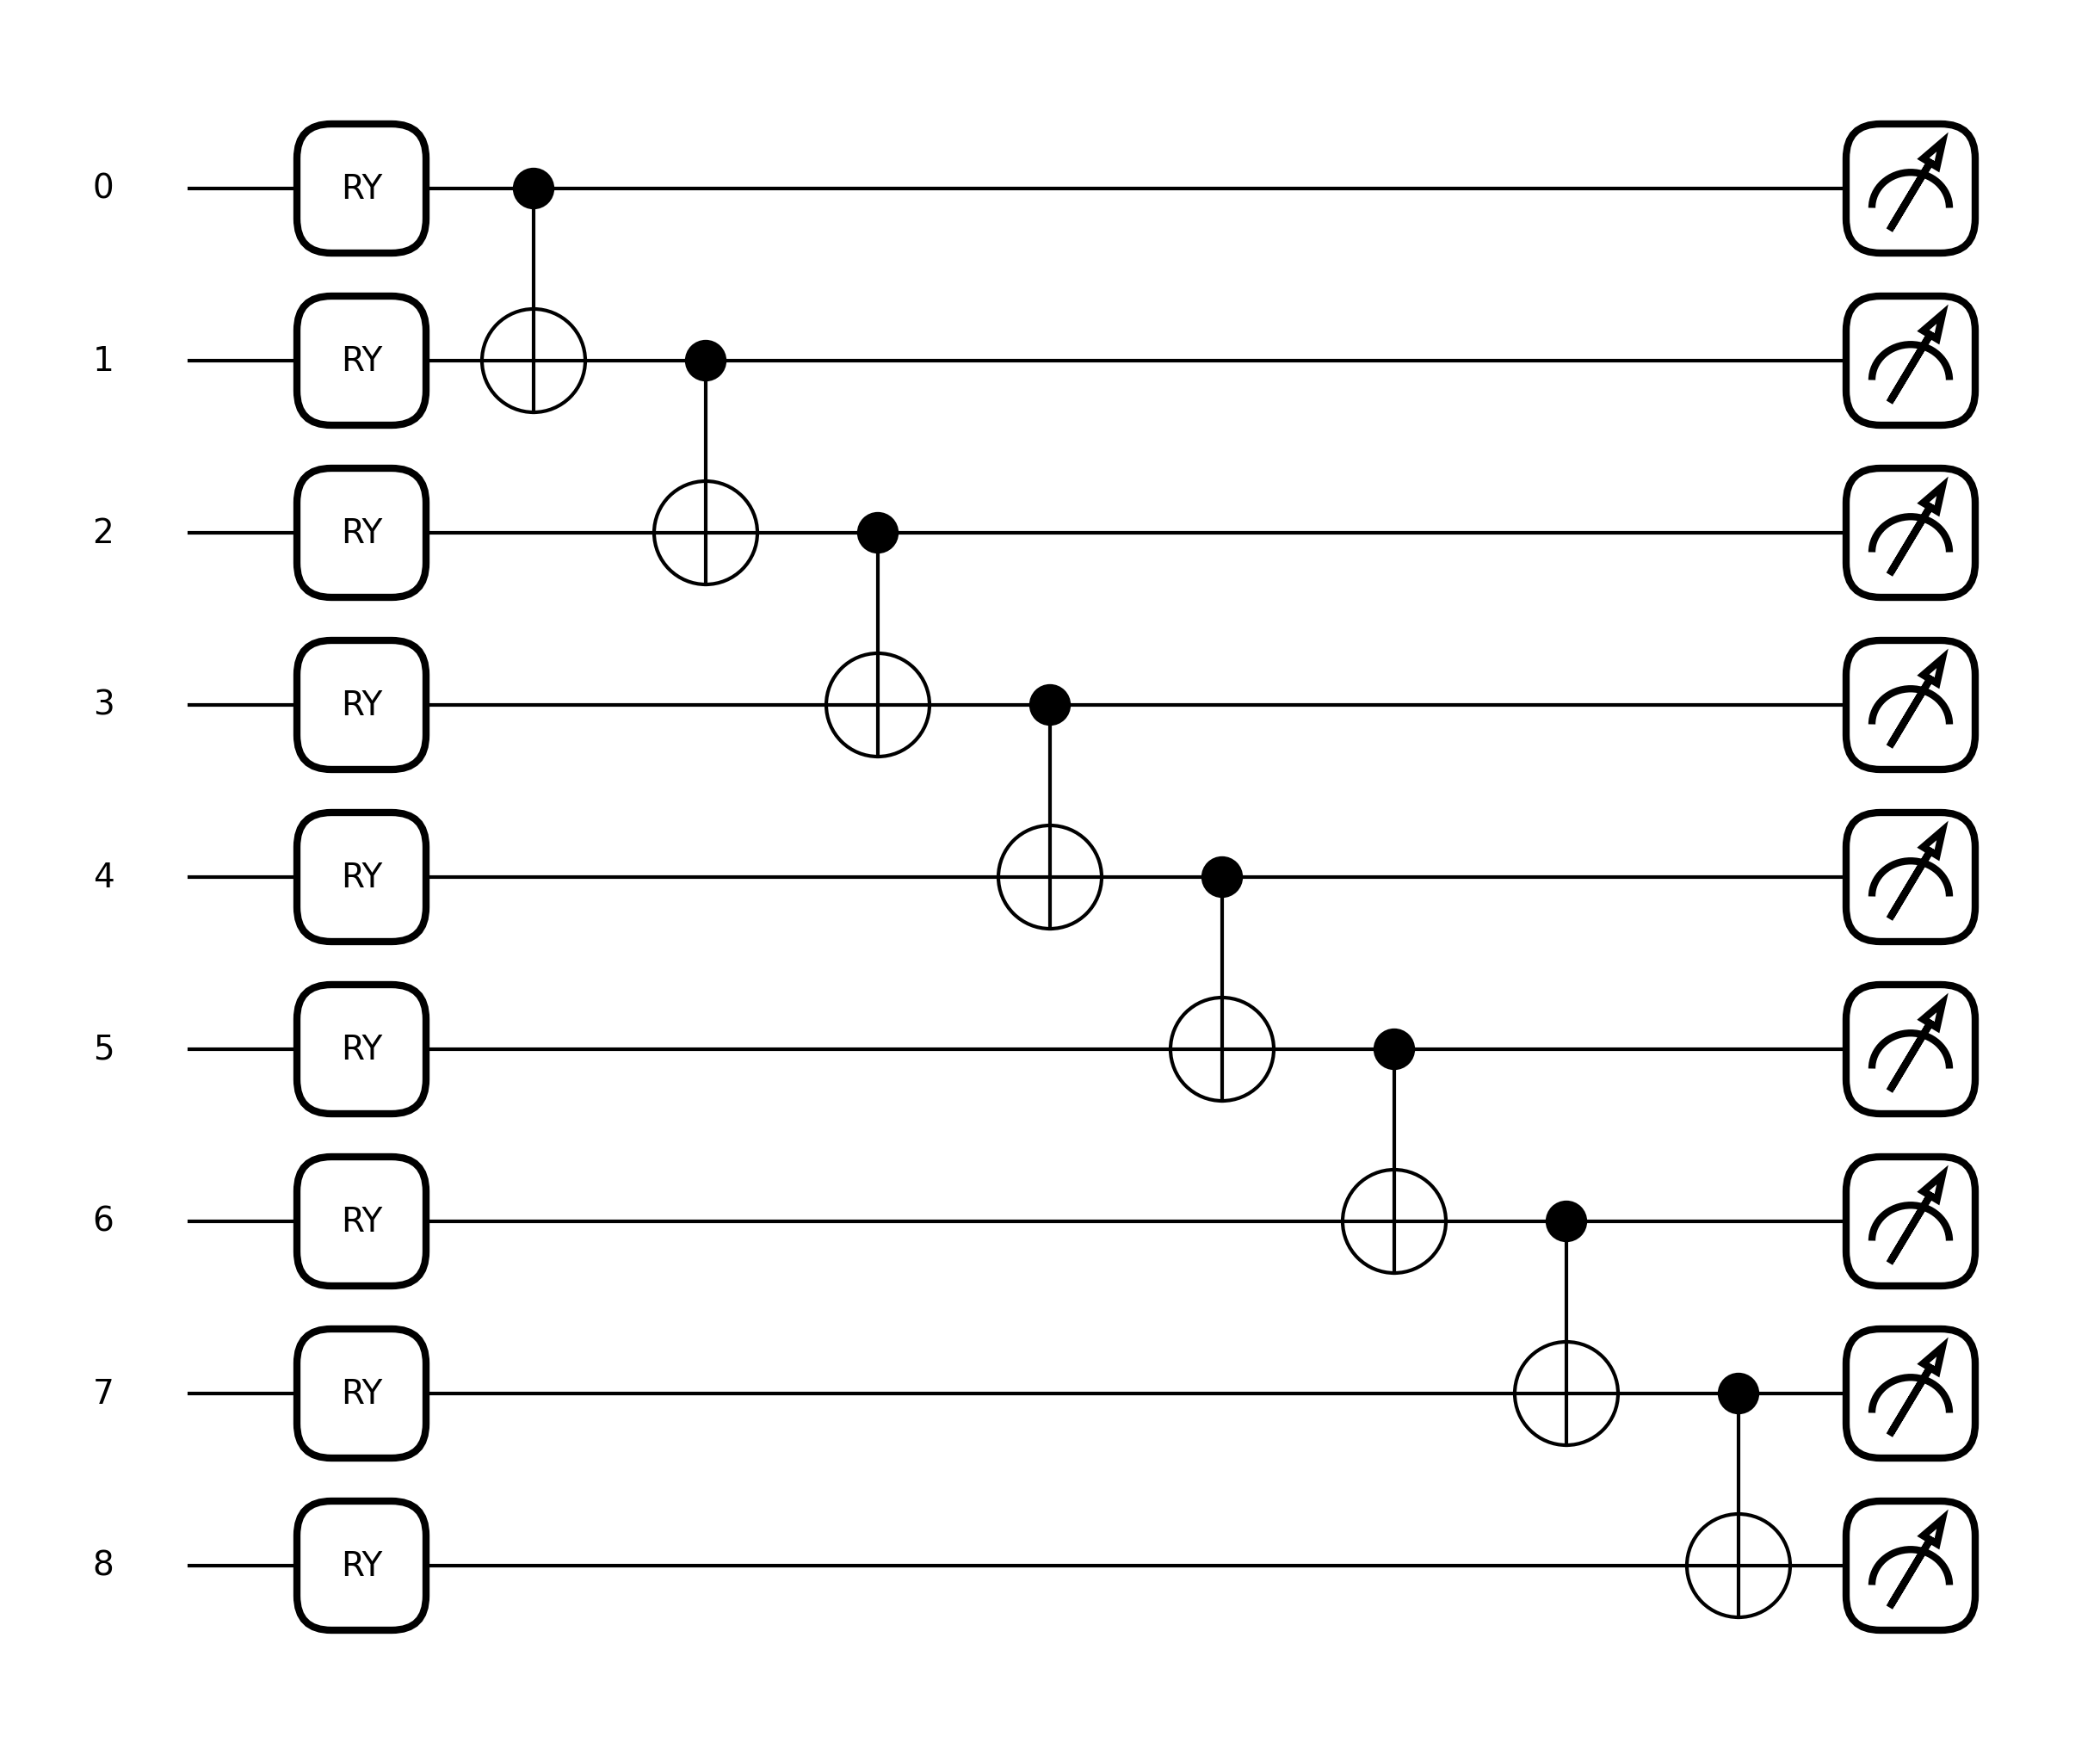

In [217]:
fig, ax = qml.draw_mpl(circuit)(params)
plt.show()

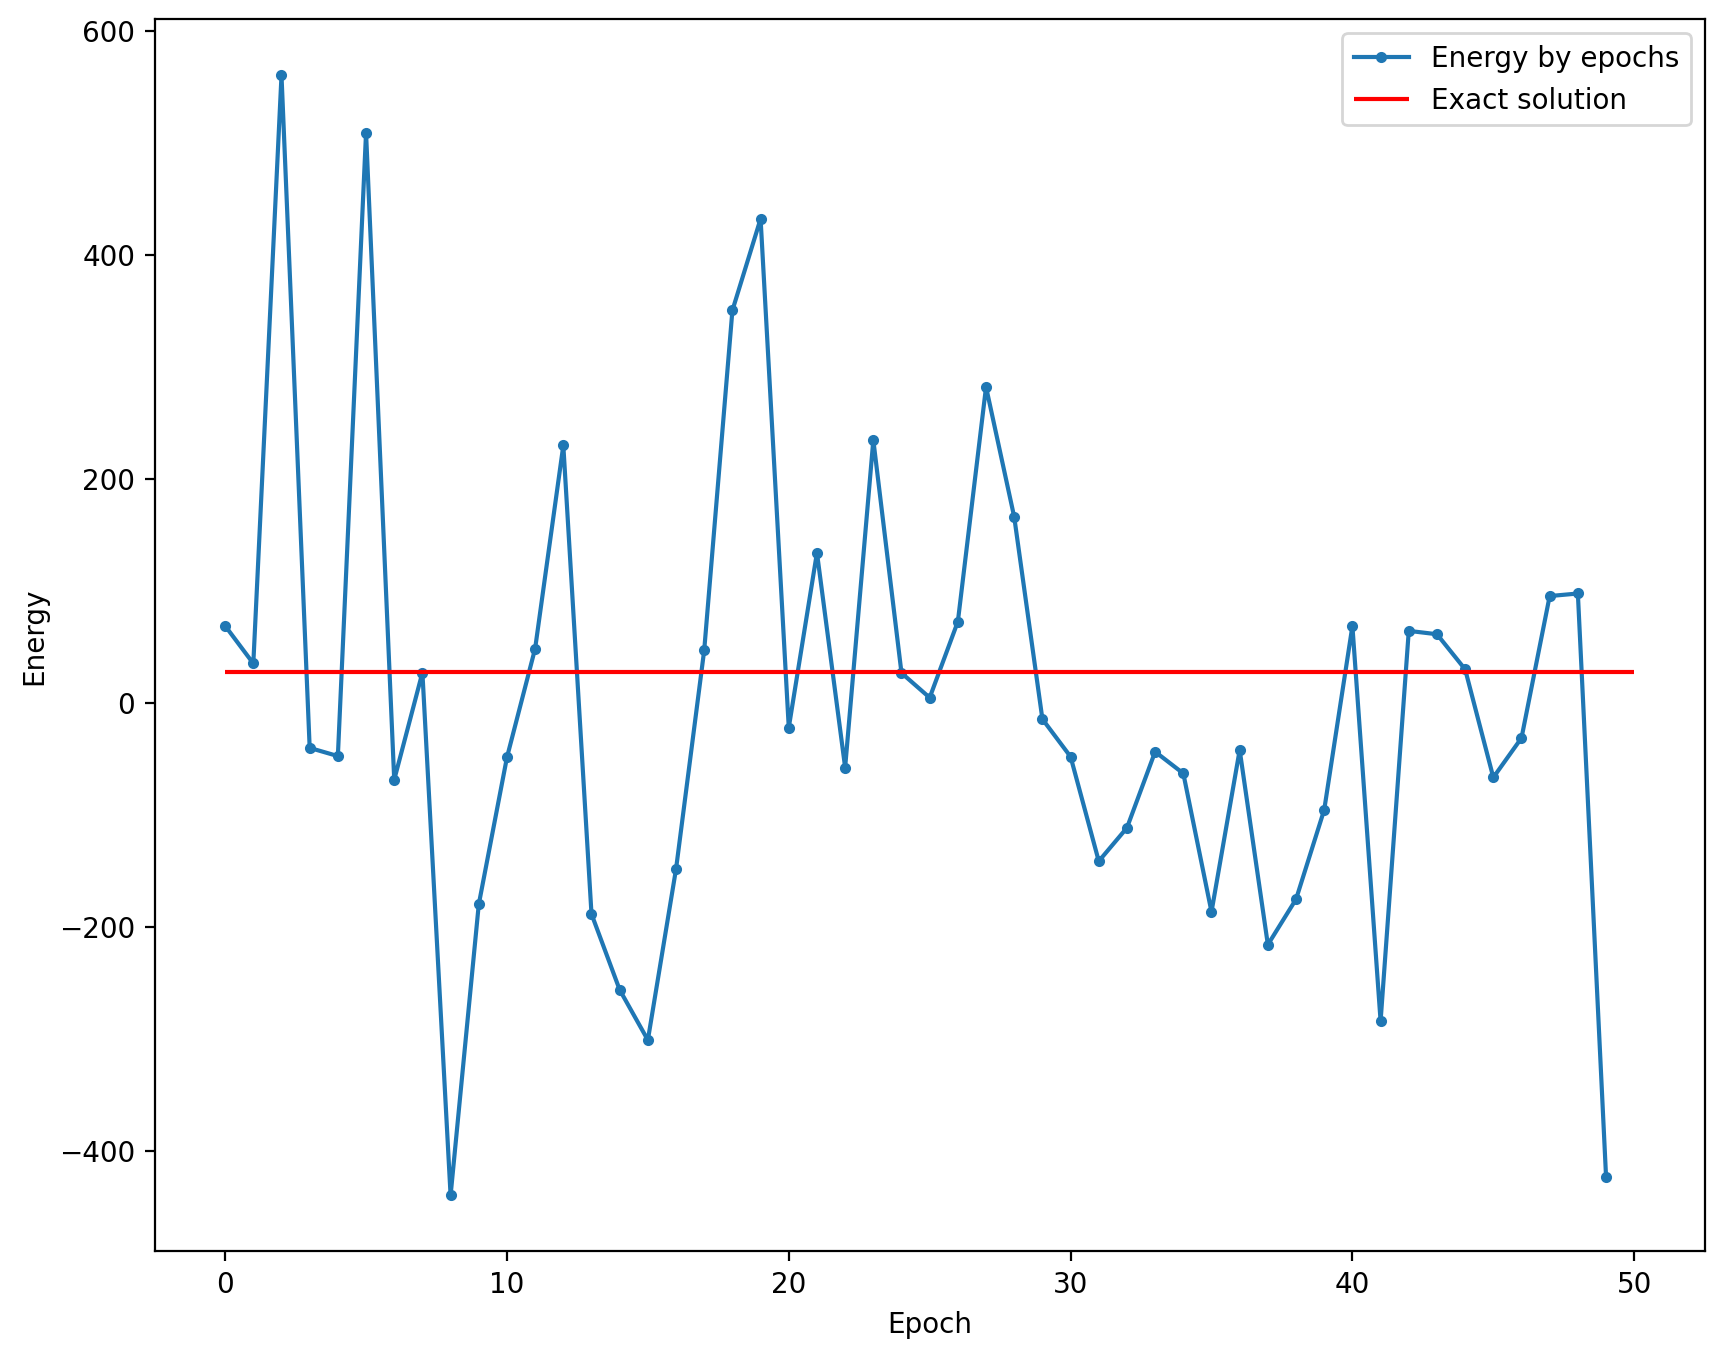

In [218]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(energy)), energy, ".-", label="Energy by epochs")
plt.hlines(
    np.real(scipy_solution[0][0]) * 0.1,
    0,
    len(energy),
    color="red",
    label="Exact solution",
)
plt.xlabel("Epoch")
plt.ylabel("Energy")
plt.legend()
plt.show()